<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/MNIST_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# load mnist
from tensorflow.keras.datasets import mnist
import numpy as np

from tensorflow import keras
#from keras import layers
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, classification_report


In [12]:
# divide it by classes (try by writers as well)
# load dataset
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain / 255
xtest = xtest /255

xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000, 28*28)

print(ytrain.shape)
print(ytrain)

#train_idx_02, train_idx_35, train_idx_69 = np.where(ytrain<=2), np.where((ytrain>=3) & (ytrain<=5)), np.where(ytrain>=6)
#test_idx_02, test_idx_35, test_idx_69 = np.where(ytest<=2), np.where((ytest>=3) & (ytest<=5)), np.where(ytest>=6)

train_idx_02, train_idx_35, train_idx_69 = ytrain<=2, (ytrain>=3) & (ytrain<=5), ytrain>=6
test_idx_02, test_idx_35, test_idx_69 = ytest<=2, (ytest>=3) & (ytest<=5), ytest>=6

xtrain_1, xtrain_2, xtrain_3 = xtrain[train_idx_02], xtrain[train_idx_35], xtrain[train_idx_69] 
ytrain_1, ytrain_2, ytrain_3 = ytrain[train_idx_02], ytrain[train_idx_35], ytrain[train_idx_69] 
xtest_1, xtest_2, xtest_3 = xtest[test_idx_02], xtest[test_idx_35], xtest[test_idx_69] 
ytest_1, ytest_2, ytest_3 = ytest[test_idx_02], ytest[test_idx_35], ytest[test_idx_69] 

print("ytrain_1:", ytrain_1)
print("ytest_1:", ytest_1)

print("xtest_1:", xtest_1.shape)
print("xtest_2:", xtest_2.shape)
print("xtest_3:", xtest_3.shape)

print("ytrain_1:",ytrain_1.shape)
print("ytest_1:",ytest_1.shape)


print(np.unique(ytrain_1))
print(np.unique(ytrain_2))
print(np.unique(ytrain_3))

print(np.bincount(ytrain_1))
print(np.bincount(ytest_1))

print(np.bincount(ytrain_2))
print(np.bincount(ytest_2))

print(np.bincount(ytrain_3))
print(np.bincount(ytest_3))

ytrain_1c = to_categorical(ytrain_1)
ytest_1c = to_categorical(ytest_1)

ytrain_2c = to_categorical(ytrain_2)
ytest_2c = to_categorical(ytest_2)

ytrain_2c = ytrain_2c[:,3:]
print(ytrain_2c[0:3])

ytrain_3c = to_categorical(ytrain_3)
ytest_3c = to_categorical(ytest_3)

ytrain_3c = ytrain_3c[:,6:]
print(ytrain_3c[0:3])


11490434/11490434 [==============================] - 0s 0us/step
(60000,)
[5 0 4 ... 5 6 8]
ytrain_1: [0 1 2 ... 0 2 1]
ytest_1: [2 1 0 ... 0 1 2]
xtest_1: (3147, 784)
xtest_2: (2884, 784)
xtest_3: (3969, 784)
ytrain_1: (18623,)
ytest_1: (3147,)
[0 1 2]
[3 4 5]
[6 7 8 9]
[5923 6742 5958]
[ 980 1135 1032]
[   0    0    0 6131 5842 5421]
[   0    0    0 1010  982  892]
[   0    0    0    0    0    0 5918 6265 5851 5949]
[   0    0    0    0    0    0  958 1028  974 1009]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


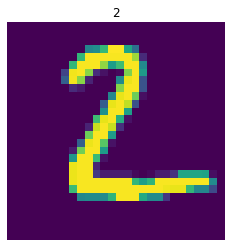

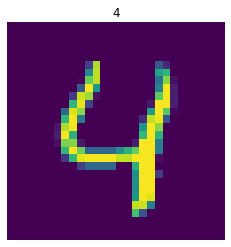

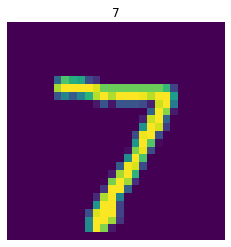

In [13]:
# plot examples
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.imshow(xtest_1[0].reshape(28, 28))#, cmap = mpl.cm.binary, interpolation="nearest")
plt.title(str(ytest_1[0]))
plt.axis("off")
plt.show()

plt.imshow(xtest_2[0].reshape(28, 28))#, cmap = mpl.cm.binary, interpolation="nearest")
plt.title(str(ytest_2[0]))
plt.axis("off")
plt.show()

plt.imshow(xtest_3[0].reshape(28, 28))#, cmap = mpl.cm.binary, interpolation="nearest")
plt.title(str(ytest_3[0]))
plt.axis("off")
plt.show()

--------------------------------------------------
[0 1 2]
--------------------------------------------------


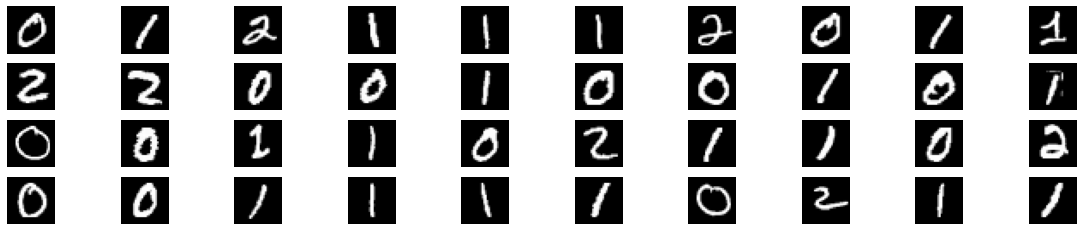

--------------------------------------------------
[3 4 5]
--------------------------------------------------


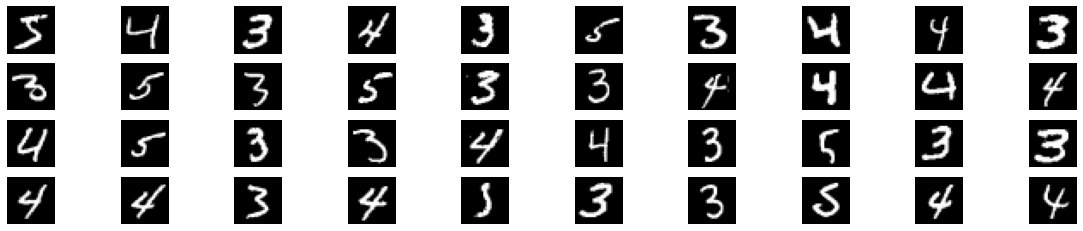

--------------------------------------------------
[6 7 8 9]
--------------------------------------------------


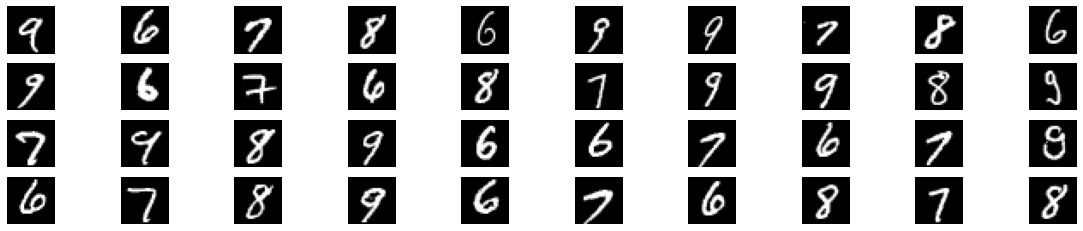

In [14]:
## Example MNIST digits for one client
print("-"*50)
print(np.unique(ytrain_1))
print("-"*50)

figure = plt.figure(figsize=(20, 4))
j = 0

for dig in xtrain_1[0:40]:
  plt.subplot(4, 10, j+1)
  plt.imshow(dig.reshape(28, 28), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

plt.show()

print("-"*50)
print(np.unique(ytrain_2))
print("-"*50)

figure = plt.figure(figsize=(20, 4))
j = 0

for dig in xtrain_2[0:40]:
  plt.subplot(4, 10, j+1)
  plt.imshow(dig.reshape(28, 28), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

plt.show()

print("-"*50)
print(np.unique(ytrain_3))
print("-"*50)

figure = plt.figure(figsize=(20, 4))
j = 0

for dig in xtrain_3[0:40]:
  plt.subplot(4, 10, j+1)
  plt.imshow(dig.reshape(28, 28), cmap='gray', aspect='equal')
  plt.axis('off')
  j += 1

plt.show()

In [15]:
# build 3 learners
model1 = Sequential()
#model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(128, activation='relu', input_shape=(28*28, )))
model1.add(Dense(3, activation='softmax'))

model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model1.summary()
plot_model(model1, to_file='m1.png', show_shapes=True, show_layer_names=True)

# fit model
history = model1.fit(xtrain_1, ytrain_1c, epochs=10, batch_size=32, validation_split = 0.2, shuffle=True, verbose=1, callbacks=[es])
res = model1.evaluate(xtest_1, ytest_1c)

#Prints the confusion matrix for learner 1 MLP:
ypred_1 = np.argmax(model1.predict(xtest_1), axis=1)

print('Confusion matrix for learner 1 MLP:')
print(confusion_matrix(ytest_1, ypred_1))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest_1, ypred_1, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest_1, ypred_1, average='weighted'),100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 100,867
Trainable params: 100,867
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
466/466 [==============================] - 2s 3ms/step - loss: 0.2266 - accuracy: 0.9479 - val_loss: 0.0950 - val_accuracy: 0.9745
Epoch 2/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9780 - val_loss: 0.0690 - val_accuracy: 0.9788
Epoch 2: early stopping
99/99 [==============================] - 0s 2ms/step
Confusion matrix for learner 1 MLP:
[[ 976    1    3]
 [   0 1128    7]
 [  20   13  

In [16]:
# build 3 learners
print(ytrain_2c.shape)
print(ytrain_2c[0:2])
model2 = Sequential()
#model1.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu', input_shape=(28*28, )))
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model2.summary()
plot_model(model2, to_file='m2.png', show_shapes=True, show_layer_names=True)

# fit model
history = model2.fit(xtrain_2, ytrain_2c, epochs=10, batch_size=32, validation_split = 0.2, shuffle=True, verbose=1, callbacks=[es])

#Prints the confusion matrix for learner 1 MLP:
ypred_2 = np.argmax(model2.predict(xtest_2), axis=1)+3

print('Confusion matrix for learner 1 MLP:')
print(confusion_matrix(ytest_2, ypred_2))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest_2, ypred_2, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest_2, ypred_2, average='weighted'),100))

(17394, 3)
[[0. 0. 1.]
 [0. 1. 0.]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 100,867
Trainable params: 100,867
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
435/435 [==============================] - 3s 6ms/step - loss: 0.3525 - accuracy: 0.8952 - val_loss: 0.1829 - val_accuracy: 0.9454
Epoch 2/10
435/435 [==============================] - 2s 5ms/step - loss: 0.1620 - accuracy: 0.9504 - val_loss: 0.1400 - val_accuracy: 0.9560
Epoch 2: early stopping
91/91 [==============================] - 1s 6ms/step
Confusion matrix for learner 1 MLP:
[[965   5  

In [17]:
# build 3 learners
model3 = Sequential()
#model1.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(128, activation='relu', input_shape=(28*28, )))
model3.add(Dense(4, activation='softmax'))

model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model3.summary()
plot_model(model3, to_file='m2.png', show_shapes=True, show_layer_names=True)

# fit model
history = model3.fit(xtrain_3, ytrain_3c, epochs=10, batch_size=32, validation_split = 0.2, shuffle=True, verbose=1, callbacks=[es])

#Prints the confusion matrix for learner 1 MLP:
ypred_3 = np.argmax(model3.predict(xtest_3), axis=1)+6

print('Confusion matrix for learner 1 MLP:')
print(confusion_matrix(ytest_3, ypred_3))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest_3, ypred_3, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest_3, ypred_3, average='weighted'),100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 100,996
Trainable params: 100,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4009 - accuracy: 0.8958 - val_loss: 0.2012 - val_accuracy: 0.9406
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1825 - accuracy: 0.9458 - val_loss: 0.1582 - val_accuracy: 0.9512
Epoch 2: early stopping
125/125 [==============================] - 0s 2ms/step
Confusion matrix for learner 1 MLP:
[[945   1  10   2]
 [  5 942  26  55]
 [ 25  

In [18]:
# aggregated model
# using ensemble learning
from sklearn.ensemble import VotingClassifier
hard_voting_classifer = VotingClassifier(estimators=[('M!', model1),
                                                     ('M2', model2),
                                                     ('M3', model3)], voting = 'hard', weights=[1,1,1])
hard_voting_classifer.fit(xtrain_3, ytrain_3c)#(xtrain, to_categorical(ytrain))
ypred = np.argmax(hard_voting_classifer(xtest), axis=1)

print("-"*30+"model evaluation"+"-"*30)
print('Hard voting:', accuracy_score(ytest, ypred))

plot_confusion_matrix(har_voting_classifier, xtest, ytest, cmap=plt.cm.Blues)
plt.show()


NotImplementedError: ignored

In [21]:
#weight aggregation
# define global model
global_model = Sequential()
#model1.add(Flatten(input_shape=(28, 28)))
global_model.add(Dense(128, activation='relu', input_shape=(28*28, )))
global_model.add(Dense(10, activation='softmax'))

global_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


# update layer[0]
print("Local models:\n")
print("Local Model 1:", model1.layers[0].get_weights()[0].shape, model1.layers[0].get_weights()[1].shape)
print("Local Model 2:", model2.layers[0].get_weights()[0].shape, model2.layers[0].get_weights()[1].shape)
print("Local Model 3:", model3.layers[0].get_weights()[0].shape, model3.layers[0].get_weights()[1].shape)

print("Global Model (layer[0]):", global_model.layers[0].get_weights()[0].shape, global_model.layers[0].get_weights()[1].shape)

#  Weights of a layer are of the shape (input x units) 
#print(global_model.layers[0].get_weights()[0])

w1 = model1.layers[0].get_weights()[0]
b1 = model1.layers[0].get_weights()[1]

w2 = model2.layers[0].get_weights()[0]
b2 = model2.layers[0].get_weights()[1]

w3 = model3.layers[0].get_weights()[0]
b3 = model3.layers[0].get_weights()[1]

#w = np.average([w3],axis=0)
#b = np.average([b3],axis=0)

w = np.average([w1, w2, w3],axis=0)
b = np.average([b1, b2, b3],axis=0)

#weigted average
#w = np.average([w1, w2, w3], axis=0, weights=(3/10, 3/10, 4/10))
#b = np.average([b1, b2, b3], axis=0, weights=(3/10, 3/10, 4/10))

#w = np.minimum.reduce([w1, w2, w3])
#b = np.minimum.reduce([b1, b2, b3]) #element wise maximum

#print("aggregated weights", w)
#print("aggregated bias", b)

#wb=[]
#wb.append(w)
#wb.append(b)

global_model.layers[0].set_weights((w, b))

#print(global_model.layers[0].get_weights()[0])
#print(global_model.layers[0].get_weights()[1])


print("Updated Weights of the global model:", model1.layers[0].get_weights()[0].shape)       #weights
print("        Bias                       :", model1.layers[0].get_weights()[1].shape)       #bias

#update layer[1]
print("-"*30+"Layer[1]"+"-"*30)
print("Global Model (layer[1]):", global_model.layers[1].get_weights()[0].shape, global_model.layers[1].get_weights()[1].shape)

w1 = model1.layers[1].get_weights()[0]
b1 = model1.layers[1].get_weights()[1]
print(w1.shape, b1.shape)

w2 = model2.layers[1].get_weights()[0]
b2 = model2.layers[1].get_weights()[1]
print(w2.shape, b2.shape)

w3 = model3.layers[1].get_weights()[0]
b3 = model3.layers[1].get_weights()[1]
print(w3.shape, b3.shape)

#print("aggregated weights", w)
#print("aggregated bias", b)

#print(wb.shape)
#print(wb)

#wb = np.array([])
W = np.concatenate((w1, w2, w3),axis=1)
B = np.concatenate((b1, b2, b3),axis=0)

global_model.layers[1].set_weights((W,B))
print("Global Model (layer[1]):\n", global_model.layers[1].get_weights()[0].shape, global_model.layers[1].get_weights()[1].shape)

# test the model



Local models:

Local Model 1: (784, 128) (128,)
Local Model 2: (784, 128) (128,)
Local Model 3: (784, 128) (128,)
Global Model (layer[0]): (784, 128) (128,)
Updated Weights of the global model: (784, 128)
        Bias                       : (128,)
------------------------------Layer[1]------------------------------
Global Model (layer[1]): (128, 10) (10,)
(128, 3) (3,)
(128, 3) (3,)
(128, 4) (4,)
Global Model (layer[1]):
 (128, 10) (10,)


In [20]:
#Prints the confusion matrix for learner 1 MLP:
ypred = np.argmax(global_model.predict(xtest), axis=1)

print('Confusion matrix for the gloabal Model:')
print(confusion_matrix(ytest, ypred))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest, ypred, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest, ypred, average='weighted'),100))

313/313 [==============================] - 1s 2ms/step
Confusion matrix for the gloabal Model:
[[635   0   0   3   2 246   4  20  69   1]
 [  0 927   0  39   0   5   0  15 116  33]
 [  6   1  67 154  78  52  46 196 280 152]
 [  7   0   0 474   2  12   3 119 285 108]
 [ 12   0   0   0 544   0   1   7   2 416]
 [ 31   2   0   7  12 535   5  43 187  70]
 [ 42   1   2   0 320 170 385   7   8  23]
 [  4   4   0   6  12   2   0 940   4  56]
 [ 20   1   1  23   8 108   0  53 589 171]
 [ 12   2   0   0  33   8   1  64   3 886]]
Precision score = 68.718 %
Recall score = 59.820 %


Train a set of deep models and then average it into a gloabl model:

In [59]:
# create a deeper model by adding one more hidden layer and do averaging and testing
print("-"*30+" Create a deeper model "+"-"*30)
print("model1:\n")
dm1 = Sequential()
dm1.add(Dense(256, activation='relu', input_shape=(28*28, )))
dm1.add(Dense(128, activation='relu'))
dm1.add(Dense(3, activation='softmax'))

dm1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

dm1.summary()
plot_model(dm1, to_file='dm1.png', show_shapes=True, show_layer_names=True)

# fit model
history = dm1.fit(xtrain_1, ytrain_1c, epochs=25, batch_size=32, validation_split = 0.2, shuffle=True, verbose=1)#, callbacks=[es])
res = dm1.evaluate(xtest_1, ytest_1c)

#Prints the confusion matrix for learner 1 MLP:
ypred_1 = np.argmax(dm1.predict(xtest_1), axis=1)

print('Confusion matrix for learner 1 MLP:')
print(confusion_matrix(ytest_1, ypred_1))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest_1, ypred_1, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest_1, ypred_1, average='weighted'),100))

------------------------------ Create a deeper model ------------------------------
model1:

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 256)               200960    
                                                                 
 dense_141 (Dense)           (None, 128)               32896     
                                                                 
 dense_142 (Dense)           (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
466/466 [==============================] - 4s 7ms/step - loss: 0.1979 - accuracy: 0.9579 - val_loss: 0.0741 - val_accuracy: 0.9785
Epoch 2/25
466/466 [==============================] - 5s 12ms/step - loss: 0

In [60]:
####################################
print("\n\n"+"-"*30+" Model 2 "+"-"*30+"\n")
dm2 = Sequential()
dm2.add(Dense(256, activation='relu', input_shape=(28*28, )))
dm2.add(Dense(128, activation='relu'))
dm2.add(Dense(3, activation='softmax'))

dm2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

dm2.summary()
plot_model(dm2, to_file='dm2.png', show_shapes=True, show_layer_names=True)

# fit model
history = dm2.fit(xtrain_2, ytrain_2c, epochs=25, batch_size=32, validation_split = 0.2, shuffle=True, verbose=1)#, callbacks=[es])

#score = dm2.evaluate(xtest_2, ytest_2c, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

#Prints the confusion matrix for learner 1 MLP:
ypred_2 = np.argmax(dm2.predict(xtest_2), axis=1)+3

print('Confusion matrix for learner 1 MLP:')
print(confusion_matrix(ytest_2, ypred_2))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest_2, ypred_2, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest_2, ypred_2, average='weighted'),100))



------------------------------ Model 2 ------------------------------

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 256)               200960    
                                                                 
 dense_144 (Dense)           (None, 128)               32896     
                                                                 
 dense_145 (Dense)           (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
435/435 [==============================] - 3s 6ms/step - loss: 0.3342 - accuracy: 0.9105 - val_loss: 0.1526 - val_accuracy: 0.9520
Epoch 2/25
435/435 [==============================] - 2s 6ms/step - loss: 0.1301 - accuracy: 0.9

In [61]:
print("-"*30+"--- Model 3 ---"+"+"*30)
dm3 = Sequential()
dm3.add(Dense(256, activation='relu', input_shape=(28*28, )))
dm3.add(Dense(128, activation='relu'))
dm3.add(Dense(4, activation='softmax'))

dm3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

dm3.summary()
plot_model(dm3, to_file='m2.png', show_shapes=True, show_layer_names=True)

# fit model
history = dm3.fit(xtrain_3, ytrain_3c, epochs=25, batch_size=32, validation_split = 0.2, shuffle=True, verbose=1)#, callbacks=[es])

#Prints the confusion matrix for learner 1 MLP:
ypred_3 = np.argmax(dm3.predict(xtest_3), axis=1)+6

print('Confusion matrix for learner 1 MLP:')
print(confusion_matrix(ytest_3, ypred_3))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest_3, ypred_3, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest_3, ypred_3, average='weighted'),100))

--------------------------------- Model 3 ---++++++++++++++++++++++++++++++
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 256)               200960    
                                                                 
 dense_147 (Dense)           (None, 128)               32896     
                                                                 
 dense_148 (Dense)           (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
600/600 [==============================] - 5s 8ms/step - loss: 0.3976 - accuracy: 0.9022 - val_loss: 0.1715 - val_accuracy: 0.9500
Epoch 2/25
600/600 [==============================] - 3s 5ms/step - loss: 0.1557 - accuracy: 

In [67]:
#weight aggregation to establish a global model
# define global model
global_model = Sequential()
global_model.add(Dense(256, activation='relu', input_shape=(28*28, )))
global_model.add(Dense(128, activation='relu'))
global_model.add(Dense(10, activation='softmax'))
global_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

global_model.summary()

for l in range(len(global_model.layers)):
  w1 = dm1.layers[l].get_weights()[0]
  b1 = dm1.layers[l].get_weights()[1]

  w2 = dm2.layers[l].get_weights()[0]
  b2 = dm2.layers[l].get_weights()[1]

  w3 = dm3.layers[l].get_weights()[0]
  b3 = dm3.layers[l].get_weights()[1]

  if l < len(global_model.layers)-1:
    w=w3
    b=b3
    #w = np.average([w1, w2, w3],axis=0)
    #b = np.average([b1, b2, b3],axis=0)
    #weigted average
    #w = np.average([w1, w2, w3], axis=0, weights=(3/10, 3/10, 4/10))
    #b = np.average([b1, b2, b3], axis=0, weights=(3/10, 3/10, 4/10))
  else:
    w = np.concatenate((w1, w2, w3),axis=1)
    b = np.concatenate((b1, b2, b3),axis=0)

  global_model.layers[l].set_weights((w, b))
  print("Global Model (layer[1]):", global_model.layers[l].get_weights()[0].shape, global_model.layers[l].get_weights()[1].shape)



# test the model
#Prints the confusion matrix for learner 1 MLP:
ypred = np.argmax(global_model.predict(xtest), axis=1)

print([ypred, ytest])

print('Confusion matrix for the gloabal Model:')
print(confusion_matrix(ytest, ypred))
# Prints precision and recall score 
print('Precision score = %0.3f %%' % np.multiply(precision_score(ytest, ypred, average='weighted'),100))
print('Recall score = %0.3f %%' % np.multiply(recall_score(ytest, ypred, average='weighted'),100))

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 256)               200960    
                                                                 
 dense_165 (Dense)           (None, 128)               32896     
                                                                 
 dense_166 (Dense)           (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Global Model (layer[1]): (784, 256) (256,)
Global Model (layer[1]): (256, 128) (128,)
Global Model (layer[1]): (128, 10) (10,)
313/313 [==============================] - 3s 8ms/step
[array([7, 6, 7, ..., 9, 8, 6]), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)]
Confusion matrix for the gloabal Model:
[[   0    0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# 1 - now merge the three models in using random permutation index
# 2 - convert weights into binary and merge bytes

print(w.shape[0],w.shape[1] )
#random.randint(a,b)

np.random.randint(0, 2, size=(4, 4))

permutation_matrix = np.random.randint(0, 3, size = w.shape)
print(permutation_matrix.shape)

print(w0.shape)

784 128
(784, 128)


NameError: ignored

In [51]:
print(len(global_model.layers))

for l in range(len(global_model.layers)):
  #print(l)
  if l < len(global_model.layers)-1:
    print(l)


3
0
1


In [ ]:
#test averagining models trained on part of the data similar to FL